# Baseline LR Keras Model

In [3]:
from tensorflow import keras
from tensorflow.keras import Sequential
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [4]:
# read in the dataset
df = pd.read_csv("concrete_data.csv")

In [5]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


### Split the data for Training and Testing

In [6]:
# first, create label and features
label = df.pop("Strength")
df.pop("Age")
features = df.copy()

In [7]:
# now split the data into train and test
x_train, x_test, y_train, y_test = train_test_split(features, label, train_size=0.7, random_state=42)

In [8]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((721, 7), (721,), (309, 7), (309,))

### Train the Model for 50 Epochs

In [9]:
# define model arch
model = Sequential([
    keras.layers.Dense(10, input_shape=(7,), activation='relu'),
    keras.layers.Dense(1)
])

# compile the model
model.compile(optimizer='adam', loss='mse')

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                80        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


In [11]:
# train
history = model.fit(x_train, y_train, epochs=50, verbose=2)

Train on 721 samples
Epoch 1/50
721/721 - 0s - loss: 21353.4741
Epoch 2/50
721/721 - 0s - loss: 5598.3293
Epoch 3/50
721/721 - 0s - loss: 2583.0452
Epoch 4/50
721/721 - 0s - loss: 2136.4949
Epoch 5/50
721/721 - 0s - loss: 1867.7720
Epoch 6/50
721/721 - 0s - loss: 1696.3012
Epoch 7/50
721/721 - 0s - loss: 1560.6680
Epoch 8/50
721/721 - 0s - loss: 1457.3945
Epoch 9/50
721/721 - 0s - loss: 1370.1393
Epoch 10/50
721/721 - 0s - loss: 1300.5579
Epoch 11/50
721/721 - 0s - loss: 1241.5216
Epoch 12/50
721/721 - 0s - loss: 1185.7167
Epoch 13/50
721/721 - 0s - loss: 1139.1665
Epoch 14/50
721/721 - 0s - loss: 1094.1197
Epoch 15/50
721/721 - 0s - loss: 1057.0143
Epoch 16/50
721/721 - 0s - loss: 1020.4533
Epoch 17/50
721/721 - 0s - loss: 990.7203
Epoch 18/50
721/721 - 0s - loss: 964.5238
Epoch 19/50
721/721 - 0s - loss: 941.3216
Epoch 20/50
721/721 - 0s - loss: 917.8701
Epoch 21/50
721/721 - 0s - loss: 896.5173
Epoch 22/50
721/721 - 0s - loss: 873.4996
Epoch 23/50
721/721 - 0s - loss: 853.1390
Epoch

### Evaluate the Model

In [12]:
preds = model.predict(x_test)

In [13]:
mean_squared_error(y_test, preds)

402.41865647221806

### Repeat 50 Times

In [14]:
mse_list = []

for i in range(50):

    print("Round:", i)
    x_train, x_test, y_train, y_test = train_test_split(features, label, train_size=0.7)

    model = Sequential([
        keras.layers.Dense(10, input_shape=(7,), activation='relu'),
        keras.layers.Dense(1)
    ])

    model.compile(optimizer='adam', loss='mse')
    model.fit(x_train, y_train, epochs=50, verbose=0)

    preds = model.predict(x_test)
    mse_list.append(mean_squared_error(y_test, preds))



Round: 0
Round: 1
Round: 2
Round: 3
Round: 4
Round: 5
Round: 6
Round: 7
Round: 8
Round: 9
Round: 10
Round: 11
Round: 12
Round: 13
Round: 14
Round: 15
Round: 16
Round: 17
Round: 18
Round: 19
Round: 20
Round: 21
Round: 22
Round: 23
Round: 24
Round: 25
Round: 26
Round: 27
Round: 28
Round: 29
Round: 30
Round: 31
Round: 32
Round: 33
Round: 34
Round: 35
Round: 36
Round: 37
Round: 38
Round: 39
Round: 40
Round: 41
Round: 42
Round: 43
Round: 44
Round: 45
Round: 46
Round: 47
Round: 48
Round: 49


### Average and STD of Mean Squared Errors

In [15]:
import numpy as np

In [16]:
mse_list

[201.548349061394,
 314.158855091862,
 356.8388762772301,
 265.95011763428045,
 214.52052135911381,
 168.34407264527786,
 391.12100977738106,
 1602.577370758079,
 200.81579434018016,
 448.61934591855555,
 202.35744593578653,
 275.6758123034684,
 225.88152083515314,
 170.8789243348409,
 473.693738049445,
 285.59978077422267,
 250.07555826473603,
 149.73424639271505,
 152.03329435257766,
 295.9581836915512,
 214.75511757170167,
 190.50157768084517,
 403.21614984582203,
 3638.825214015736,
 302.6015000439033,
 216.31850252578585,
 247.72698604565943,
 256.9038529657454,
 190.8129974059019,
 770.8911167078345,
 315.6828543859031,
 318.78169833665345,
 157.39280513936959,
 155.46319820079287,
 162.73530146184495,
 329.0208180671709,
 754.0558725593929,
 191.11668813919414,
 214.66098992623455,
 179.64162204911065,
 149.58003605342154,
 228.1254917288205,
 166.54683123981468,
 509.0101424575464,
 444.42536765328646,
 164.82574634281272,
 246.4332147812306,
 151.52988087516437,
 442.916330297

In [17]:
np.mean(mse_list), np.std(mse_list)

(370.39701240763503, 520.684039704897)

In [18]:
import matplotlib.pyplot as plt

(array([45.,  3.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([ 149.58003605,  498.50455385,  847.42907165, 1196.35358944,
        1545.27810724, 1894.20262503, 2243.12714283, 2592.05166063,
        2940.97617842, 3289.90069622, 3638.82521402]),
 <a list of 10 Patch objects>)

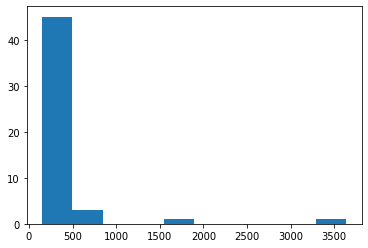

In [19]:
plt.hist(mse_list)

There is quite a bit of skew in the 50 results of MSE, as noted by the histogram above and the relatively high standard deviation. However, most results were within the 150 to 500 range.